<a href="https://colab.research.google.com/github/raeubaen/kid/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install lsq-ellipse

In [2]:
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ellipse import LsqEllipse
from matplotlib.patches import Ellipse
import matplotlib
import sys
import random
from tqdm import tqdm

In [6]:
f = '/content/drive/MyDrive/KID/piccolo7luglio/data'

df = pd.read_csv(f, sep=" ").iloc[200000:600000]
df.columns = ["i", "q", "t"]
df = df.sort_values(["t"])
df = df.reset_index()

In [ ]:
df = df.iloc[::100] #every 100
df.i = df.i/4095 * 3.3
df.q = df.q/4095 * 3.3

In [ ]:
X = np.array(list(zip(df.i, df.q)))

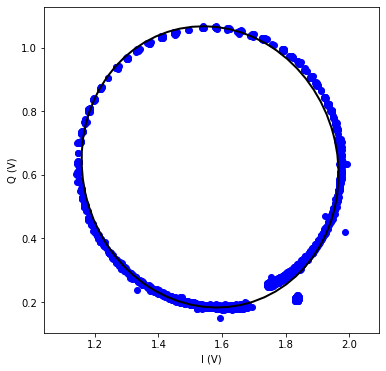

In [ ]:
plt.close()
reg = LsqEllipse().fit(X)
center, width, height, phi = reg.as_parameters()
 
'''
print(f'center: {center[0]:.3f}, {center[1]:.3f}')
print(f'width: {width:.3f}')
print(f'height: {height:.3f}')
print(f'phi: {phi:.3f}')
'''
 
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
ax.axis('equal')
ax.scatter(df.i, df.q, color='blue', label='sweep')
ellipse = Ellipse(
    xy=center, width=2*width, height=2*height, angle=np.rad2deg(phi),
    edgecolor='k', fc='None', lw=2, zorder=2
)
ax.add_patch(ellipse)
 
plt.xlabel('I (V)')
plt.ylabel('Q (V)')

''' 
fondo = cir.iloc[((cir.i - center[0])**2 + (cir.q - center[1])**2).argmin()]
plt.scatter(res.i, res.q, c = np.asarray(res.index), zorder=1)
plt.scatter(dg.i, dg.q, color='red', marker='o', label='300s on resonance')
plt.scatter(fondo.i, fondo.q, marker='*')
plt.legend(loc='center',prop={'size': 12})
'''

plt.show()
plt.close()

In [ ]:
print(iq_ratio)

0.9009703602355689


In [ ]:
i_c, q_c = center
iq_ratio = width/height
radius = width

In [ ]:
threshold = _data.i.iloc[:200].rolling(30).mean().diff(periods=30).std()*6
print(threshold)

0.006500616236176971


In [ ]:
def plot_wave_form(scale=True, threshold = threshold, periods = 30):
  sz = int(len(_data.iloc[:1000000])/25 )

  fig, axs = plt.subplots(5, 5, figsize=(30, 20))

  ymin, ymax = _data.min(), _data.max()

  for i in range(5):
    for j in range(5):
      n  = 5*i+j
      data = _data.iloc[:1000000].iloc[n*sz:(n+1)*sz]
      if not scale: axs[i][j].set_ylim(ymin, ymax)
      axs[i][j].plot(data.index, data.i)
      a = data[data.rolling(30).mean().diff(periods=30) > threshold]
      axs[i][j].scatter(a.index, a.i, c='red')
      axs[i][j].set_xticks([])
      axs[i][j].set_yticks([])
      
      for s in range(1, 4): axs[i][j].axvline(x = n*sz + s*3332)

  plt.show()

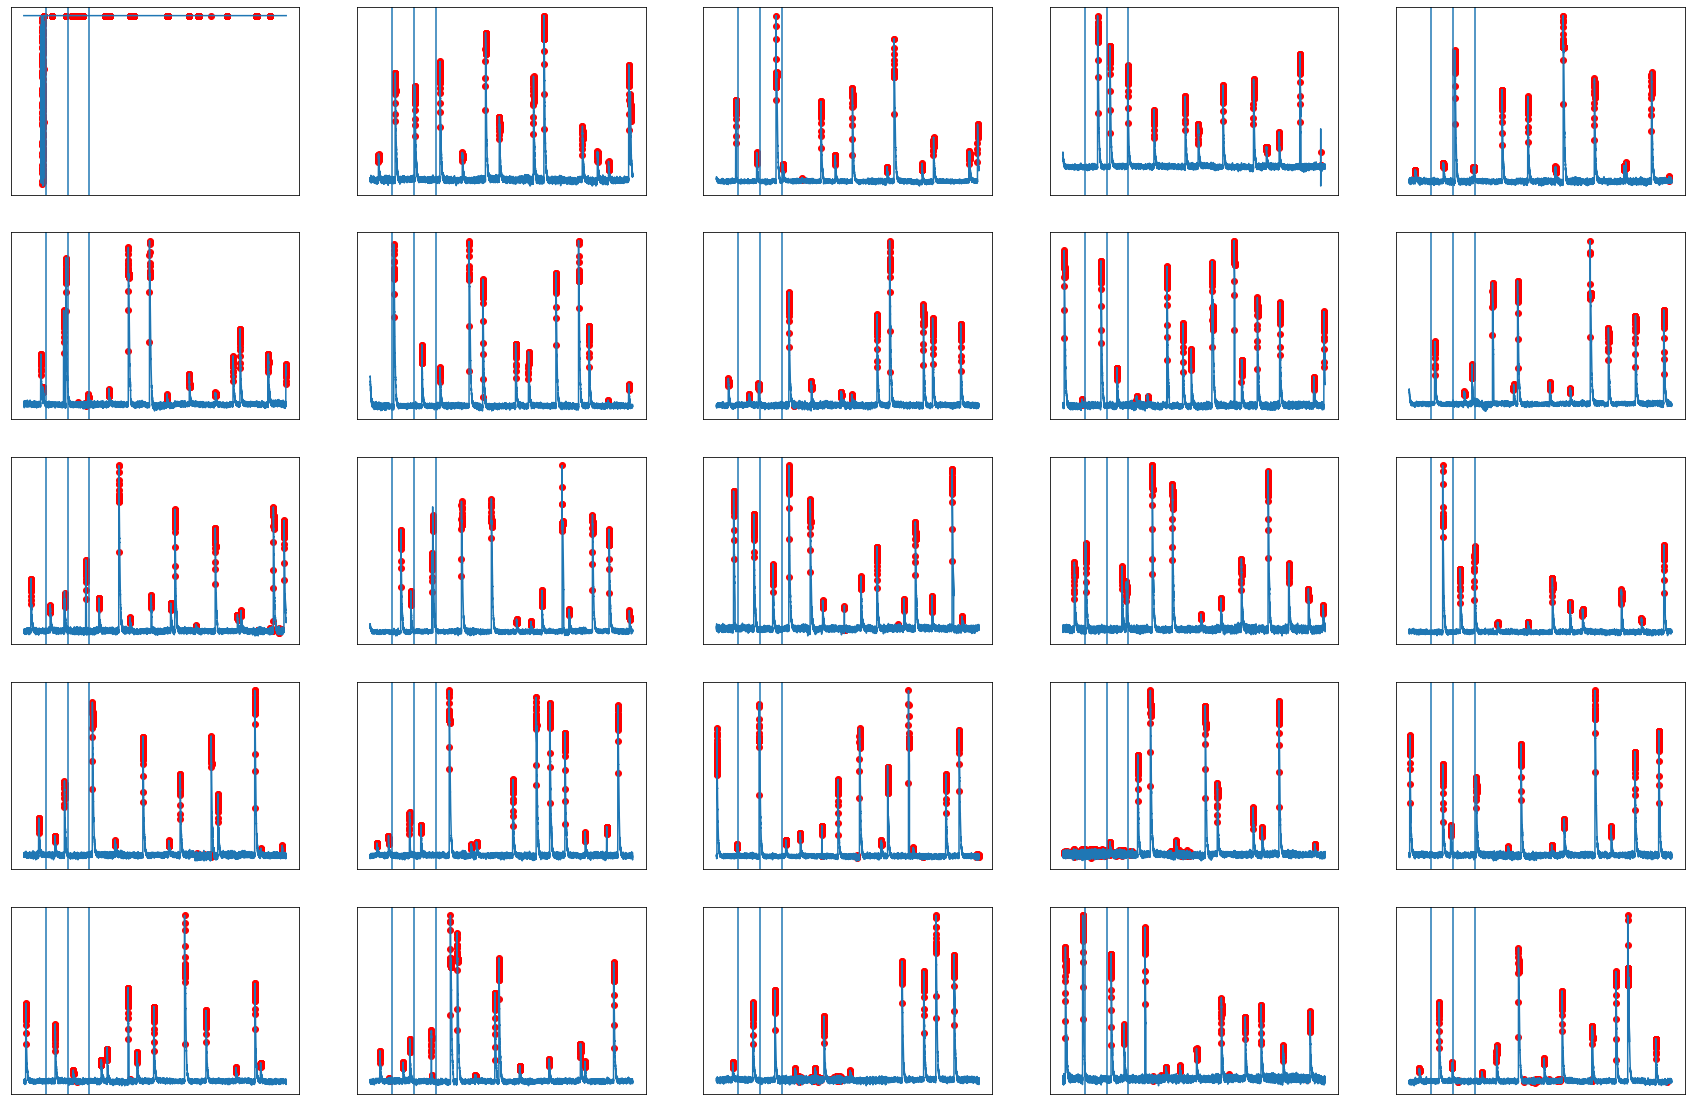

In [ ]:
plot_wave_form() #1.7 s of data

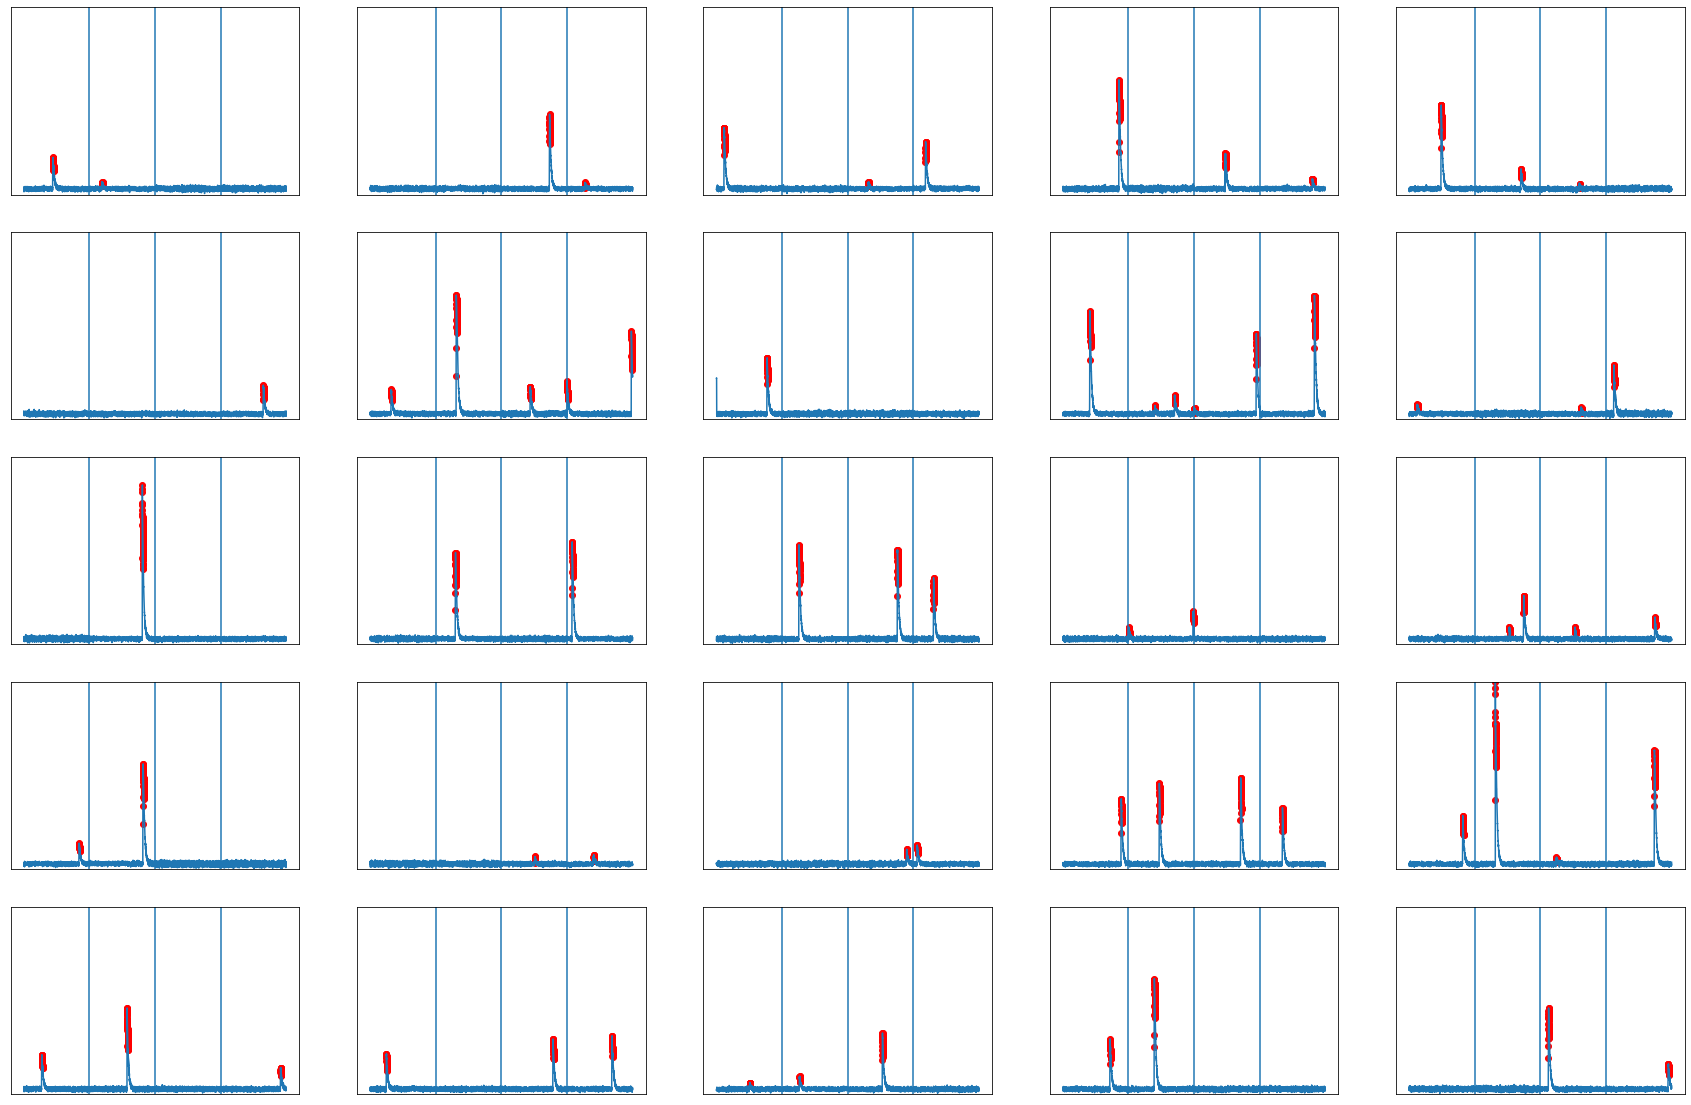

In [ ]:
plot_wave_form(scale=False)

In [3]:
df_array = []

folder = "/content/drive/MyDrive/KID/nofibrameno10dbm"

df = pd.read_csv(f"{folder}/signal1.dat", sep=" ")
df.columns = ["i", "q", "t"]
df = df[df.i < 4096]
df = df.reset_index()
df.i *= 3.3/4095
df.q *= 3.3/4095
threshold = df.i.iloc[:200].rolling(30).mean().diff(periods=30).std()*5.8
print(threshold)

for i in tqdm(range(1, 10990)):
  try:
     df = pd.read_csv(f"{folder}/signal{i}.dat", sep=' ')
  except: continue
  df.columns = ["i", "q", "t"]
  df = df.sort_values(["t"])
  df = df.reset_index()
  df.i *= 3.3/4095
  df.q *= 3.3/4095
  a = df.i.rolling(30).mean().diff(periods=30).max()
  if a > threshold:
    df_array.append(df)

print(len(df_array))

  0%|          | 0/10989 [00:00<?, ?it/s]

0.007049146599196612


100%|██████████| 10989/10989 [01:01<00:00, 180.06it/s] 

128


In [ ]:
def get_phase(data):
    q = (data.q - q_c) * iq_ratio + q_c
    return np.unwrap(2*np.arctan((q-q_c)/(data.i-i_c)))/2

In [ ]:
def get_amp(data):
    q = (data.q - q_c) * iq_ratio + q_c
    return np.sqrt((q-q_c)**2 + (i-i_c)**2)

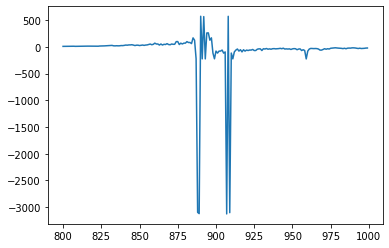

In [ ]:
q = (dfs[0].q - q_c) * iq_ratio + q_c
plt.plot((q-q_c).iloc[800:1000]/(dfs[0].i-i_c).iloc[500:1000])

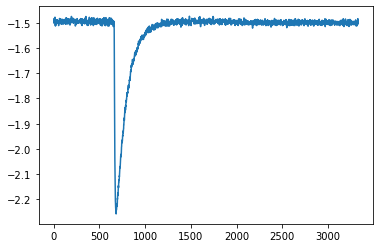

In [ ]:
phase = get_phase(dfs[0])
plt.plot(phase)

In [ ]:
dfs = random.sample(df_array, 25)

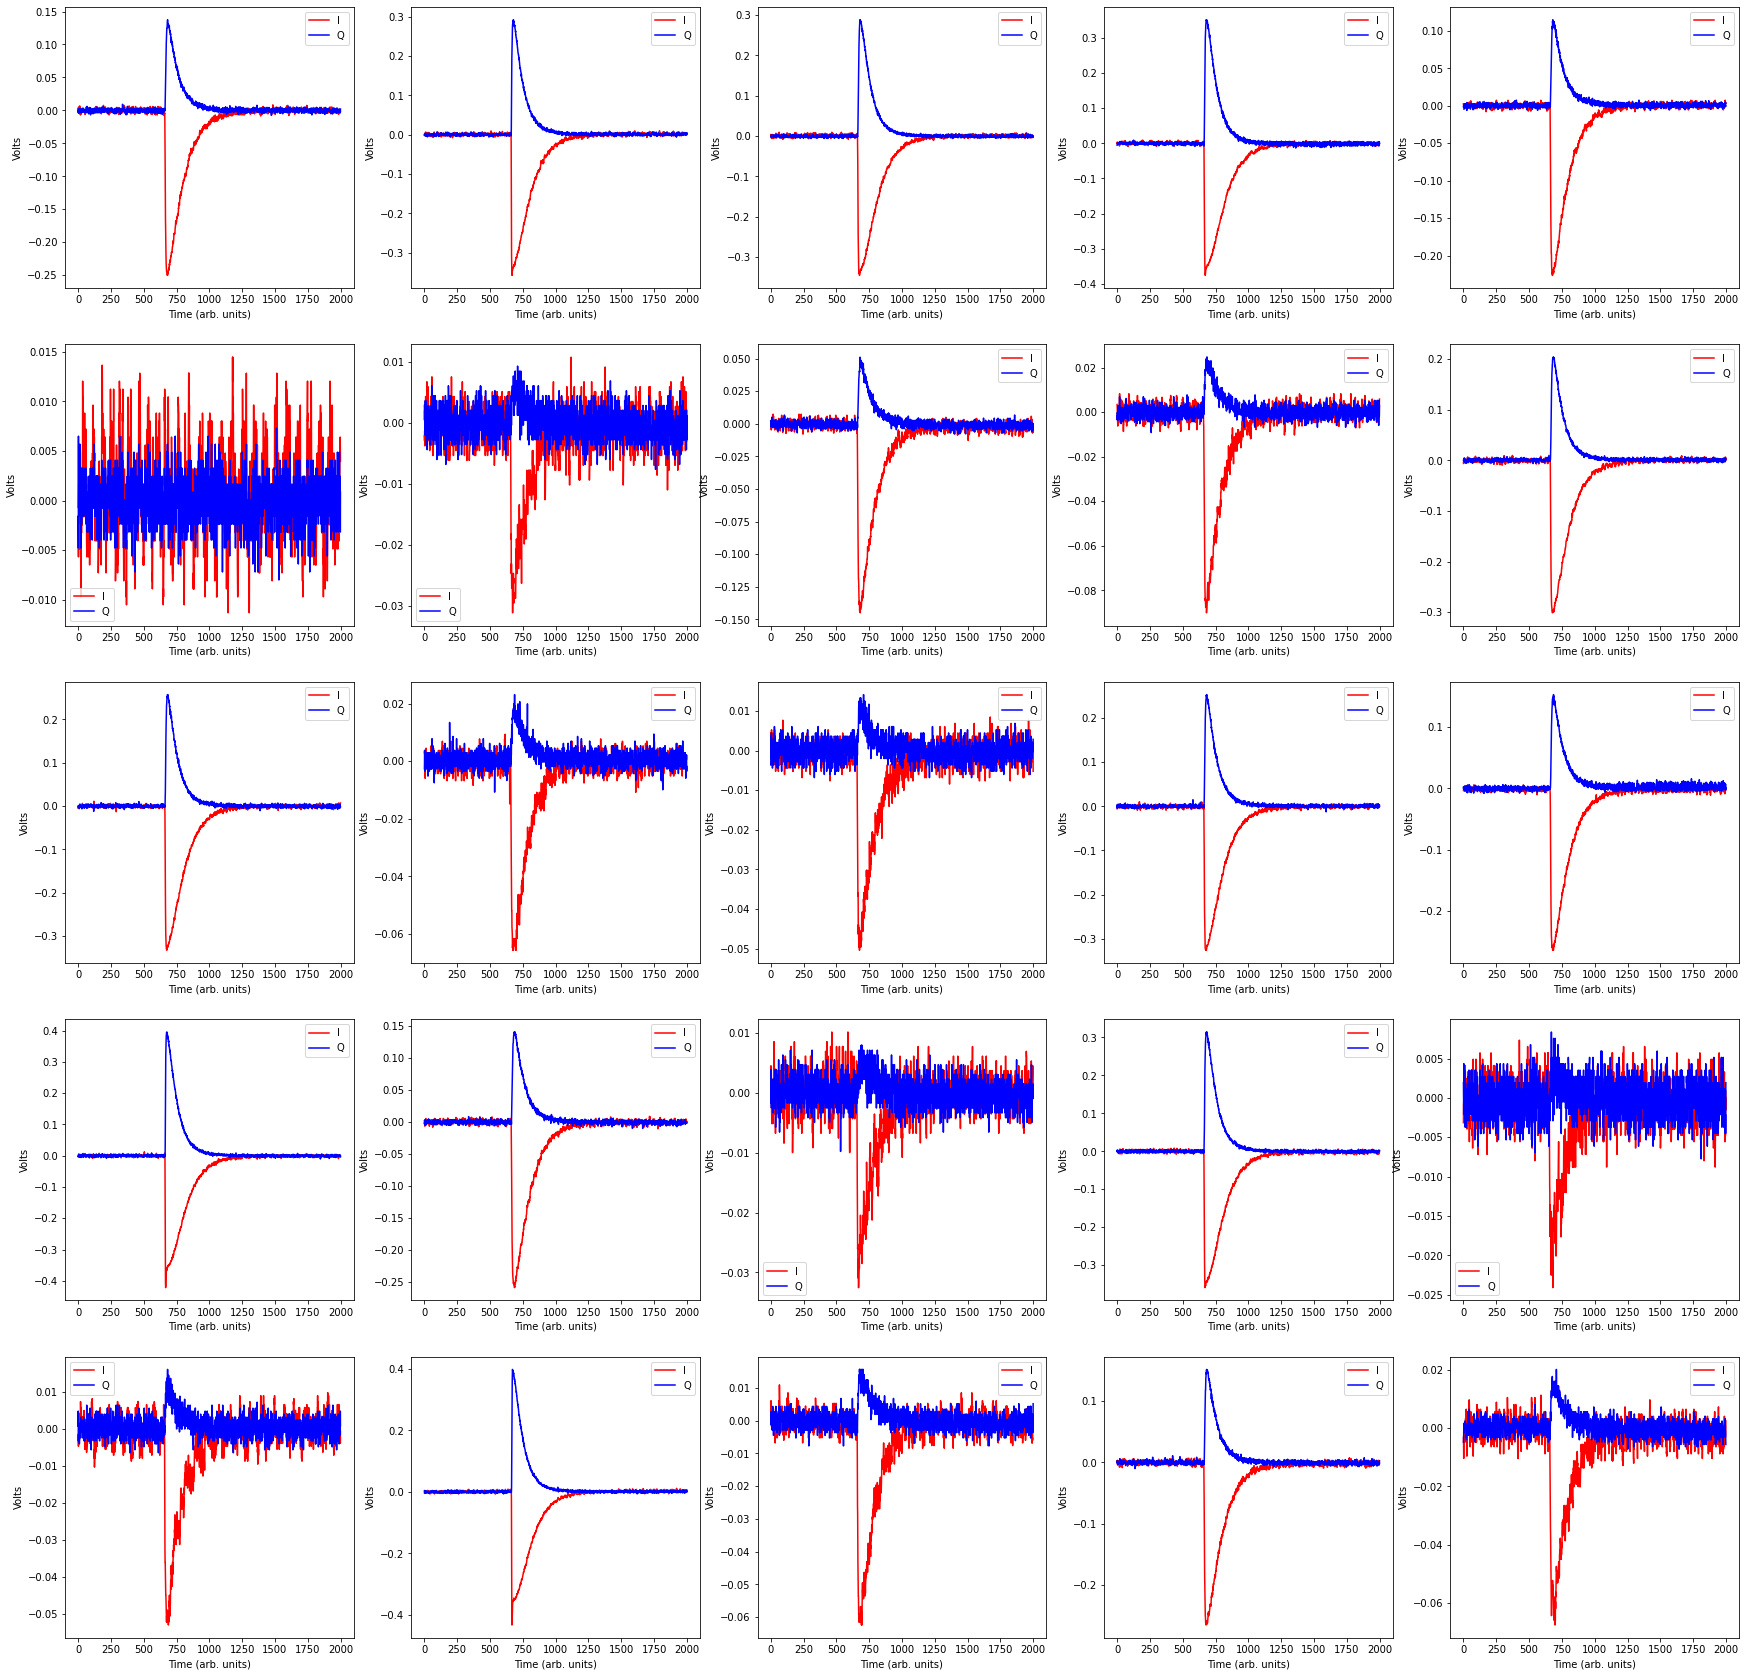

In [ ]:
fig, axs = plt.subplots(5, 5, figsize=(30, 30))
for i in range(5):
  for j in range(5):
    n  = 5*i+j
    axs[i][j].plot(dfs[n].i.iloc[:100].mean() - dfs[n].i.iloc[:2000], label="I", color="red")
    axs[i][j].plot(dfs[n].q.iloc[:100].mean() - dfs[n].q.iloc[:2000], label="Q", color="blue")
    axs[i][j].set(xlabel="Time (arb. units)", ylabel="Volts")
    axs[i][j].legend()

fig.savefig("pulses0.pdf")
plt.show()

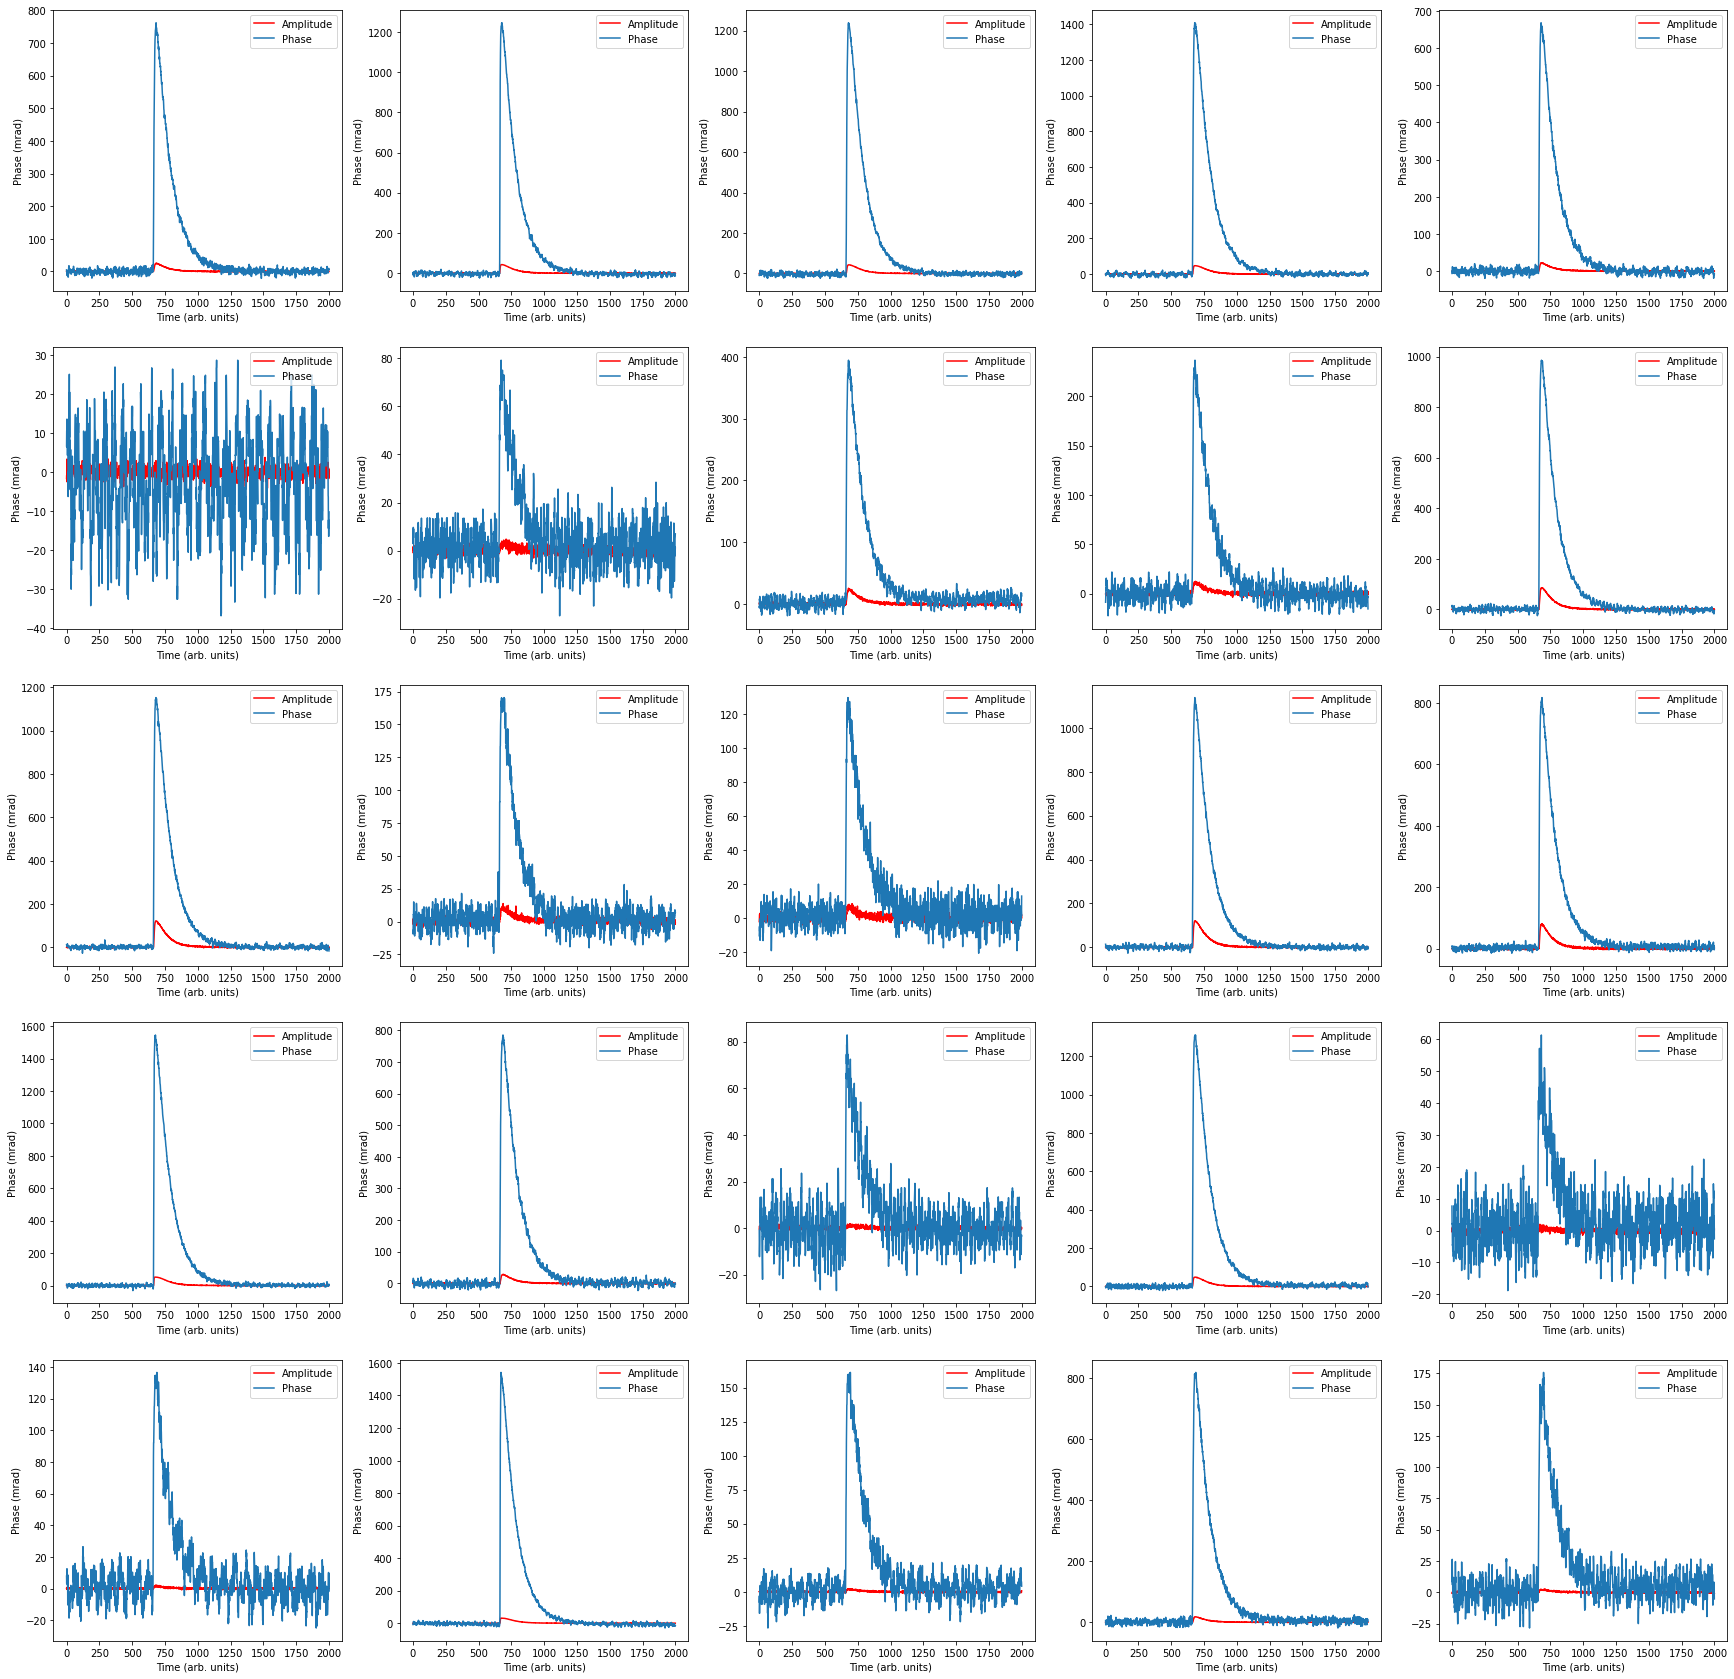

In [ ]:
fig, axs = plt.subplots(5, 5, figsize=(30, 30))
for i in range(5):
  for j in range(5):
    n  = 5*i+j
    phase = get_phase(dfs[n])*1000
    amp = get_amp(dfs[n])*1000
    axs[i][j].plot(amp[:100].mean() - amp[:2000], label="Amplitude", color="red")
    axs[i][j].plot(phase[:100].mean() - phase[:2000], label="Phase")
    axs[i][j].set(xlabel="Time (arb. units)", ylabel="Phase (mrad)")
    axs[i][j].legend()

fig.savefig("pulses.pdf")
plt.show()

In [ ]:
phase_peaks = []
for df in df_array:
  phase = get_phase(df)*1000
  phase_s = (phase[:100].mean() - phase[:2000])
  phase_m_index = np.argmax(phase_s)
  amp = get_amp(df)*1000
  amp_s = (amp[:100].mean() - amp[:2000])
  amp_m_index = np.argmax(amp_s)
  print(phase_m_index, amp_m_index)

679 679
682 682
684 687
685 685
678 684
679 679
679 685
683 685
679 682
688 688
678 689
678 696
683 687
684 702
666 659
684 684
685 685
675 1308
675 678
684 689
681 681
685 685
673 1703
689 686
679 682
677 677
685 679
683 683
672 672
679 683
685 684
681 730
675 679
680 683
679 685
680 680
682 681
679 692
671 466
683 683
694 687
680 689
687 682
679 685
673 677
685 683
680 680
679 679
678 702
686 695
673 668
687 715
677 677
678 684
682 679
681 684
676 1918
687 687
680 685
678 688
675 689
676 678
682 684
687 678
667 711
680 682
683 685
682 682
694 700
681 681
674 690
672 713
681 681
684 684
681 686
668 679
682 739
679 684
676 681
683 683
666 731
666 447
679 685
682 669
680 723
680 707
682 682
672 466
684 684
683 690
680 691
679 679
682 689
683 683
681 681
679 682
684 684
684 684
683 683
680 682
682 682
679 685
679 687
702 692
687 687
684 674
678 696
678 690
683 694
679 682
681 682
685 683
674 692
684 684
677 686
684 686
680 680
683 689
685 687
687 687
675 677
675 746
701 686
686 686
681 6

KeyboardInterrupt: ignored

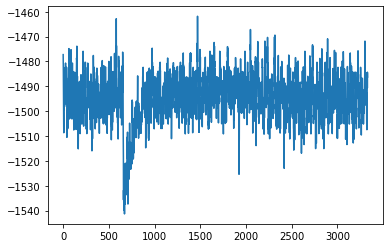

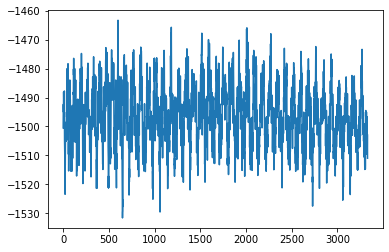

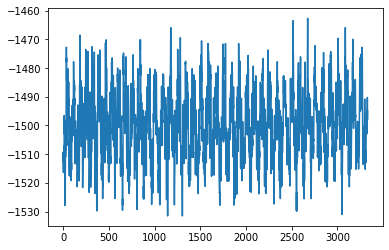

In [ ]:
phase_peaks = []
for df in df_array:
  phase = get_phase(df)*1000
  phase_m = (phase[:100].mean() - phase[:2000]).max()
  if phase_m < 50:
    plt.plot(phase)
    plt.show()
  phase_peaks.append(phase_m)
phase_peaks = np.array(phase_peaks)

In [ ]:
len(phase_peaks)

425

Text(0.5, 0, 'Phase (rad)')

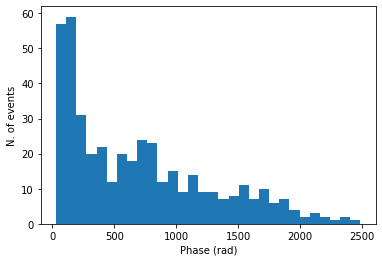

In [ ]:
plt.hist(phase_peaks, bins=30)
plt.ylabel("N. of events")
plt.xlabel("Phase (rad)")

Text(0.5, 0, 'Phase (rad)')

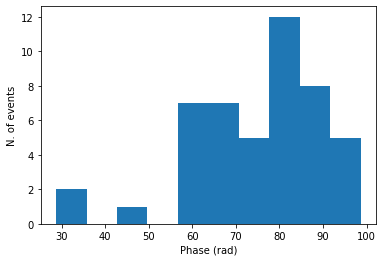

In [ ]:
plt.hist(phase_peaks[phase_peaks < 100])
plt.ylabel("N. of events")
plt.xlabel("Phase (rad)")

Text(0.5, 0, 'Phase (rad)')

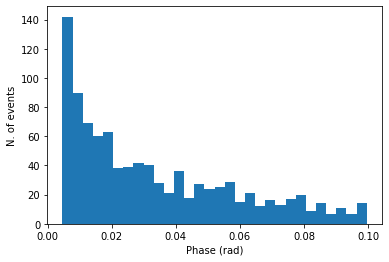

In [ ]:
plt.hist(phase_peaks[phase_peaks < 0.1], bins=30)
plt.ylabel("N. of events")
plt.xlabel("Phase (rad)")

In [ ]:
phase_peaks < 50

3

In [ ]:
_data = pd.read_csv("/content/drive/MyDrive/KID/nofibrameno10dbm/data", sep=" ")
_data.columns = ["i", "q", "t"]
_data = _data[_data.i < 4096]
_data = _data.reset_index()
_data.i *= 3.3/4095
_data.q *= 3.3/4095
threshold = _data.i.iloc[:200].rolling(30).mean().diff(periods=30).std()*6
print(threshold)